# Install and Import Dependencies

Source:  https://pytorch.org/get-started/locally/#linux-anaconda

In my case was used:
<br>
PyTorch Build:&emsp;&emsp;&emsp;&emsp;Stable(2.1.2)
<br>
Your OS:&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Linux
<br>
Package:&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Pip
<br>
Language:&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Python
<br>
Compute Platform:&emsp;&emsp;CUDA 12.1

In [1]:
# Install PyTorch
# This can be done using Terminal: pip install torch torchvision torchaudio

import torch

try:
    # Attempt to import torch
    torch_version = torch.__version__
    print(f"PyTorch version {torch_version} is installed.")
except ImportError:
    print("PyTorch is not installed on your machine. Installing now...")

    # Install PyTorch and its dependencies using pip
    try:
        import subprocess
        subprocess.run(['pip', 'install', 'torch', 'torchvision', 'torchaudio'], check=True)
        print("PyTorch and its dependencies installed successfully.")
    except subprocess.CalledProcessError:
        print("Failed to install PyTorch and its dependencies. Please install them manually.")


PyTorch version 2.1.2+cu121 is installed.


##  Clone Yolo V5 and  install requirements
### Source: https://github.com/ultralytics/yolov5

In [2]:
import os
import subprocess

def create_path(path):
    """ Create a new folder """
    folder_path = path
    
    # Expand the tilde to the home directory
    expanded_path = os.path.expanduser(folder_path)
    
    # Create the directory and its parents if they don't exist
    os.makedirs(expanded_path, exist_ok=True)
    
    # Check if the directory was created successfully
    if os.path.exists(expanded_path) and os.path.isdir(expanded_path):
        print(f"Step 1: The folder '{expanded_path}' exists or has been created.")
        return expanded_path
    else:
        print(f"Step 1: Failed to create the folder '{expanded_path}'.")
        return None

def check_path(path):
    """ Check if the folder exists """
    if os.path.isdir(path):
        print(f"Step 2: The folder '{path}' exists.")
        return True
    else:
        print(f"Step 2: The folder '{path}' does not exist or is not a directory.")
        return False

def clone_repository(path):
    """ Clone YOLOv5 repository """
    repo_url = 'https://github.com/ultralytics/yolov5'
    
    try:
        # Change to the specified directory
        os.chdir(path)
        
        # Clone the repository
        subprocess.run(['git', 'clone', repo_url], check=True)
        print(f"Step 3: Successfully cloned YOLOv5 repository.")
        return True
    except subprocess.CalledProcessError:
        print(f"Step 3: Failed to clone YOLOv5 repository.")
        return False

def install_requirements(path):
    """ Install YOLOv5 requirements """
    requirements_file = os.path.join(path, 'yolov5', 'requirements.txt')

    if os.path.isfile(requirements_file):
        print(f"Step 4: The file 'requirements.txt' exists.")

        # Run the pip install command
        pip_command = f'pip install -r {requirements_file}'
        os.system(pip_command)
        print(f"Step 4: Executed: {pip_command}")
    else:
        print(f"Step 4: The file 'requirements.txt' does not exist in the specified path.")

# Define the pipeline
def run_pipeline(path):
    step1_result = create_path(path)
    
    if step1_result:
        step2_result = check_path(step1_result)
        
        if step2_result:
            step3_result = clone_repository(step1_result)
            
            if step3_result:
                install_requirements(os.path.join(step1_result, 'yolov5'))

# Usage:
run_pipeline('~/Documents/PyTorch')


Step 1: The folder '/home/codewizard/Documents/PyTorch' exists or has been created.
Step 2: The folder '/home/codewizard/Documents/PyTorch' exists.
Step 3: Failed to clone YOLOv5 repository.


fatal: destination path 'yolov5' already exists and is not an empty directory.


# Imports

In [3]:
import subprocess

def install_dependencies(package):
    """ Install Dependencies """
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing now...")
        try:
            subprocess.run(['pip', 'install', package], check=True)
            print(f"{package} installed successfully.")
        except subprocess.CalledProcessError:
            print(f"Failed to install {package}. Please install it manually.")

# Define the pipeline
def check_dependencies(packages):
    """ Check Dependencies if Exists """
    
    for package in packages:
        install_dependencies(package)

# Run the pipeline
packages_to_check = ['cv2', 'matplotlib', 'numpy']
check_dependencies(packages_to_check)


cv2 is already installed.
matplotlib is already installed.
numpy is already installed.


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [5]:
# Load the model from the Torch Hub, 
# If we need a pre-trained version add this param: 'pretrained=True'
"""
Command:
torch.hub.load - Load an ultralytics model from Torch Hub, more info: https://pytorch.org/hub/ultralytics_yolov5/

Params:
'ultralytics/yolov5' - Package that we need
'yolov5s' - Model Version, (s) - Model Size
"""

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/codewizard/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-22 Python-3.11.5 torch-2.1.2+cu121 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
pip install torch --upgrade

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch

torch.backends.cudnn.benchmark = True  # If you're using CUDA
device = torch.device('cpu')


In [8]:
model = torch.hub.load('ultralytics/yolov5:master', 'yolov5s').to(device)


Using cache found in /home/codewizard/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-22 Python-3.11.5 torch-2.1.2+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
# Make sure all is loaded
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

<i>img</i>&emsp;-&emsp;&emsp;&emsp;&emsp;&emsp;is a string which representing a link to the image source
<br>
<i>results</i>&emsp;-&emsp;&emsp;&emsp;&emsp;is a variable which contains a process, which was generated by the model <i>'yolov5s'</i>
<br>
<i>result.print()</i>&emsp;-&emsp;this is a function which return a discription of the image, in this case it will detect 2 persons, and 2 ties.
<br>
DISCRITION:
<br>
image qty:&emsp;1 out of 1
<br>
size:&emsp;&emsp;&emsp;&emsp;720x1280
<br>
detection:&emsp;2 persons, 2 ties

In [10]:
img = 'https://ultralytics.com/images/zidane.jpg'
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1270.3ms pre-process, 184.1ms inference, 99.8ms NMS per image at shape (1, 3, 384, 640)


### Rendering

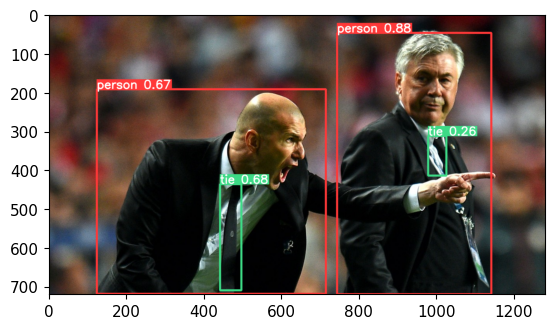

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### More info about Img:

results.xyxy - provide following info:
- xmin
- ymin
- xmax
- ymax
- confidence
- class


In [12]:
results.xyxy

[tensor([[7.43291e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79860e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66694e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

### New Random Test
<br>
<i>img source:</i>&emsp;&emsp;&emsp;https://www.bostonglobe.com/2020/06/13/metro/slowly-surely-traffic-is-making-its-return-bostons-highways/

In [13]:
traffic_img = 'https://bostonglobe-prod.cdn.arcpublishing.com/resizer/FPEd4j5q3ItkmTXUin_RsQdYxg8=/820x0/cloudfront-us-east-1.images.arcpublishing.com/bostonglobe/OOVN3WW4HFVQVGHYHIHE5TXABI.jpg'

In [14]:
# To display an image before using a model, I will use Pillow for that, lest check is it installed or not
check_dependencies(['Pillow'])

Pillow is not installed. Installing now...
Pillow installed successfully.


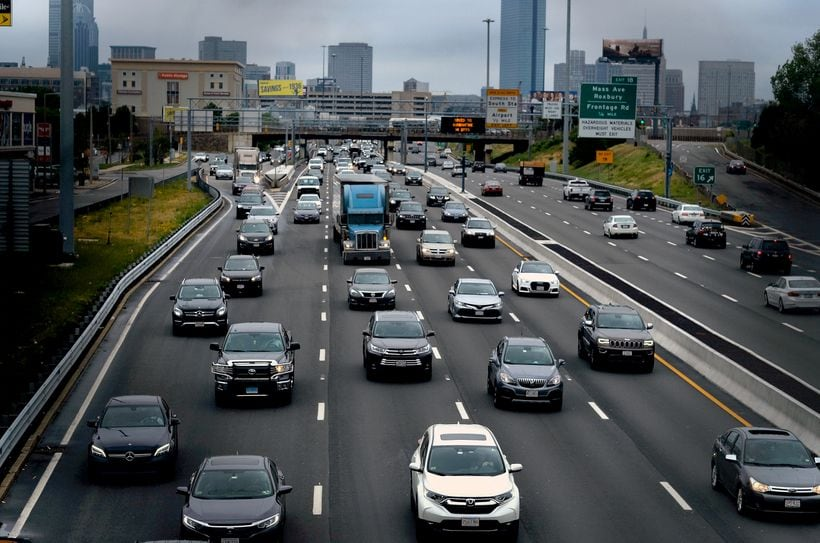

In [15]:
from PIL import Image
import requests
from IPython.display import display

def display_image(image_link):
    # Download the image from the provided link
    response = requests.get(image_link, stream=True)
    response.raise_for_status()
    
    # Open the image using PIL
    image = Image.open(response.raw)
    
    # Display the image
    display(image)

display_image(traffic_img)

In [16]:
# Now let's apply the model YoloV5s

results = model(traffic_img)
results.print()

image 1/1: 543x820 28 cars, 1 bus, 4 trucks, 1 traffic light
Speed: 110.9ms pre-process, 143.2ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


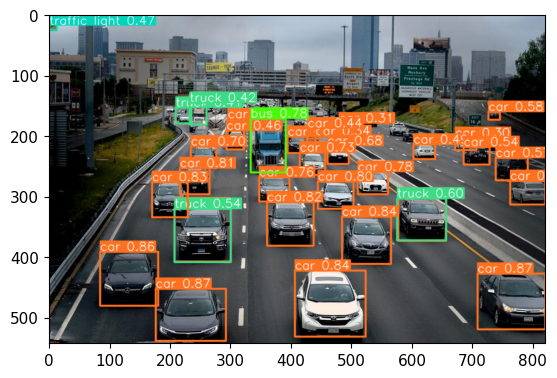

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

as we can see the biggest part of cars has been detected correctly, except the Bus, and a traffic light, the model recognized a truck as a bus :)

# Real Time Detection

### Setup / Test a Webcam

In [18]:
def live_view():
    # Create a VideoCapture object to capture video from the default camera (0)
    cap = cv2.VideoCapture(0)

    # Check if the camera opened successfully
    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    # Start an infinite loop to continuously capture frames from the camera
    while True:
        # Read a frame from the video capture
        ret, frame = cap.read()

        # Check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # Display the captured frame in a window named 'Video Capture'
        cv2.imshow('Video Capture', frame)

        # Check for a key press, and if the key is 'q', exit the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the VideoCapture object to free up resources
    cap.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

In [19]:
# Test the camera
# live_view()

### Adding Model 'YoloV5s'

In [20]:
def model_view():

    # Create a VideoCapture object to capture video from the default camera (0)
    cap = cv2.VideoCapture(0)
    
    # Start an infinite loop to continuously capture frames from the camera
    while cap.isOpened():
        # Read a frame from the video capture
        ret, frame = cap.read()
    
        # Apply the YOLOv5 model to the captured frame
        results = model(frame)
    
        # Display the processed frame with bounding boxes using OpenCV
        cv2.imshow('YOLOV5s', np.squeeze(results.render()))
    
        # Wait for a key press for 10 milliseconds and check if the key pressed is 'q' to exit the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    # Release the VideoCapture object to free up resources
    cap.release()
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()

In [21]:
# Test live capture with YoloV5s Model
# model_view()

### Check My Front Camera (remove it ?)

In [22]:
def hik_model_vision(user_name, password, ip_address, channel):
    # Hikvision camera RTSP URL
    rtsp_url = f"rtsp://{user_name}:{password}@{ip_address}/Streaming/Channels/{channel}"
    
    # Create a VideoCapture object with the RTSP URL
    cap = cv2.VideoCapture(rtsp_url)
    
    # Adjust frame resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    # Check if the camera opened successfully
    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return
    
    frame_count = 0
    skip_frames = 5  # Adjust as needed
    
    while True:
        # Read a frame from the video capture
        ret, frame = cap.read()
    
        # Check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break
    
        frame_count += 1
    
        # Process every 5th frame
        if frame_count % skip_frames == 0:
            # Apply the YOLOv5 model to the captured frame
            results = model(frame)
    
            # Display the processed frame with bounding boxes using OpenCV
            cv2.imshow('YOLOV5s', np.squeeze(results.render()))
    
        # Check for a key press, and if the key is 'q', exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the VideoCapture object to free up resources
    cap.release()
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()

In [23]:
# Input USERNAME + PASSWORD

user_name = ''
password = ''
ip_address = '192.168.1.9'
channel = 2

# hik_model_vision(user_name, password, ip_address, channel)

# Collect Images

<b>Unique Identifier</b>&emsp;-&emsp;helps to identify images (adds an ID to each image that will be used for training)

<b>OS</b>&emsp;-&emsp;Provides a way to interact with the operating system, including functions to manipulate file paths, execute commands, and manage the environment.

<b>time</b>&emsp;-&emsp;module, which provides various time-related functions, such as sleeping, measuring time intervals, and working with timestamps.



In [24]:
import uuid  # Unique Identifier
import os    # os library 
import time  # time interval

<b>IMAGES PATH</b>&emsp;-&emsp;a file path for the 'images' directory within the 'data' directory, using the 'os.path.join' function to handle path construction in a platform-independent way. in other words, the path will be represented like this: `/data/images`, in this case images will stored in `~/Documents/PyTorch/yolov5/data/images`
<br>
<b>labels</b>&emsp;-&emsp;Define class labels for a binary classification problem in machine learning, in this case, the classes are 'awake' and 'drowsy,' representing two possible states.
<br>
<b>number_imgs</b>&emsp;-&emsp;Define the number of images to be used or processed, in this case, 'number_imgs' is set to 20.


In [25]:
IMAGES_PATH = os.path.join('yolov5/data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

Using a camera on your computer, you want to take some pictures automatically, and this is one of the ways of doing this.
<br>
In this case, I will use different labels for my pictures, like 'awake' or 'drowsy'. 
<br>
The code below will take a set number of pictures for each label. (the number of images can be changed here `number_imgs = 20`)
<br>
The pictures are saved in a special folder on the local machine. Each picture has a name, which is like a special code. It's made using the label, a special ID that will be generated using a unique identifier(`uuid.uuid1()`), and it's saved in a format that most pictures use, like '`.jpg`'.

In [26]:
def collect_img():
    # Open a connection to the default camera (camera index 0)
    cap = cv2.VideoCapture(0)
    
    # Loop through each label
    for label in labels:
        print('Collecting images for {}'.format(label))
        
        # Pause for 5 seconds to allow the user to prepare
        time.sleep(5)
    
        # Loop through the specified number of images
        for img_num in range(number_imgs):
            print('Collecting images for {}, image number {}'.format(label, img_num))
    
            # Read a frame from the camera
            ret, frame = cap.read()
    
            # Construct a unique image name using the label and a UUID
            img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
    
            # Save the frame as an image file
            if frame is not None and not frame.size == 0:
                cv2.imwrite(img_name, frame)
            else:
                print("Error: Empty frame or image not loaded correctly.")
    
            # Display the collected imageq
            cv2.imshow('Image Collection', frame)
    
            # Pause for 2 seconds before capturing the next image
            time.sleep(5)
    
            # Wait for a key press for 10 milliseconds and check if the key pressed is 'q' to exit the loop
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        
        # Release the VideoCapture object to free up resources
        cap.release()
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()
    

# Image Labeling

In [27]:
# !git clone https://github.com/HumanSignal/labelImg.git

### Install Dependencies

#### To run Terminal process, make sure you are in the same dir where you clone labelImg.

<b>Terminal process:</b>
<br>
sudo apt-get install pyqt5-dev-tools
<br>
sudo pip3 install -r requirements/requirements-linux-python3.txt
<br>
make qt5py3
<br>
python3 labelImg.py

<b>Jupyter Notebook process:</b>

In [28]:
import os
import subprocess

# Install labelImg using pip (this assumes labelImg is available on PyPI)
# subprocess.run(["pip", "install", "labelImg"])                             # uncomment this: #

<b>image_path</b>&emsp; - &emsp; This is a path where collected img was stored,
<br>
in my case:
<br>
<i>IMAGES_PATH = os.path.join('yolov5/data', 'images')</i>
<br>

<br>
<b>class_file</b>&emsp; - &emsp; This is a new folder that I created for storing labeled images
<br>
in my case:
<br>
<i>class_file = os.path.join('yolov5/data', 'labels')</i>

#### Question: 
Where <i>'predefined_classes.txt'</i> is came from?

#### Answer: 
When you run the code below, you specify a directory, where labeled images will be stored, the 'labelImg App' will create this file in that directory.

In [29]:
# Modify this code:

# image_path = "/path/to/your/images"
# class_file = "/path/to/your/predefined_classes.txt"

image_path = "~/Documents/PyTorch/yolov5/data/images"
class_file = "~/Documents/PyTorch/labelImg/data/predefined_classes.txt"

In [30]:
# Specify the command to run labelImg
# command = f"labelImg {image_path} {class_file}"                 # uncomment this: #

# Run the command
# subprocess.run(command, shell=True)                             # uncomment this: #

# Train The Model

### Explonation

### Create YAML file

#### Inside of dataset.yaml file:

path: ../data
<br>
train: images
<br>
val: images
<br>
nc: 17
<br>
names:['dog','person','cat','tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','awake','drowsy']


<b>cd yolov5</b>&emsp; - &emsp;-&emsp;-&emsp;-&emsp;-&emsp; Step in to directory yoloV5s was cloned&emsp;<b>(Check&emsp;run_pipeline()&emsp;method)</b>
<br>
<b>python train.py</b>&emsp; - &emsp;-&emsp;-&emsp; Python runs train.py file.
<br>
<b>--img 320</b>&emsp; - &emsp;-&emsp;-&emsp;-&emsp;-&emsp;  Size of the picture which will be used for training.
<br>
<b>--batch 16 --epochs 5</b>&emsp; - &emsp; Model parameters.
<br>
<b>--data dataset.yaml</b>&emsp; - &emsp; models data will be generated in this file.<b>(This file needs to be created manually)</b>
<br>
<b>--weights yolov5s.pt</b>&emsp; - &emsp; Which models weights will be used.
<br>

In [31]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 24 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-254-gba63208 Python-3.11.5 torch-2.1.2+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

### After Model finished training all data was stored in 'runs/train/exp'

####  in my case Results saved to runs/train/exp3

####  In runs/train/exp3/weights/
#### model creates 2 files:
#### best.pt and last.pt
Time to load custom model using last.pt

## Graphs

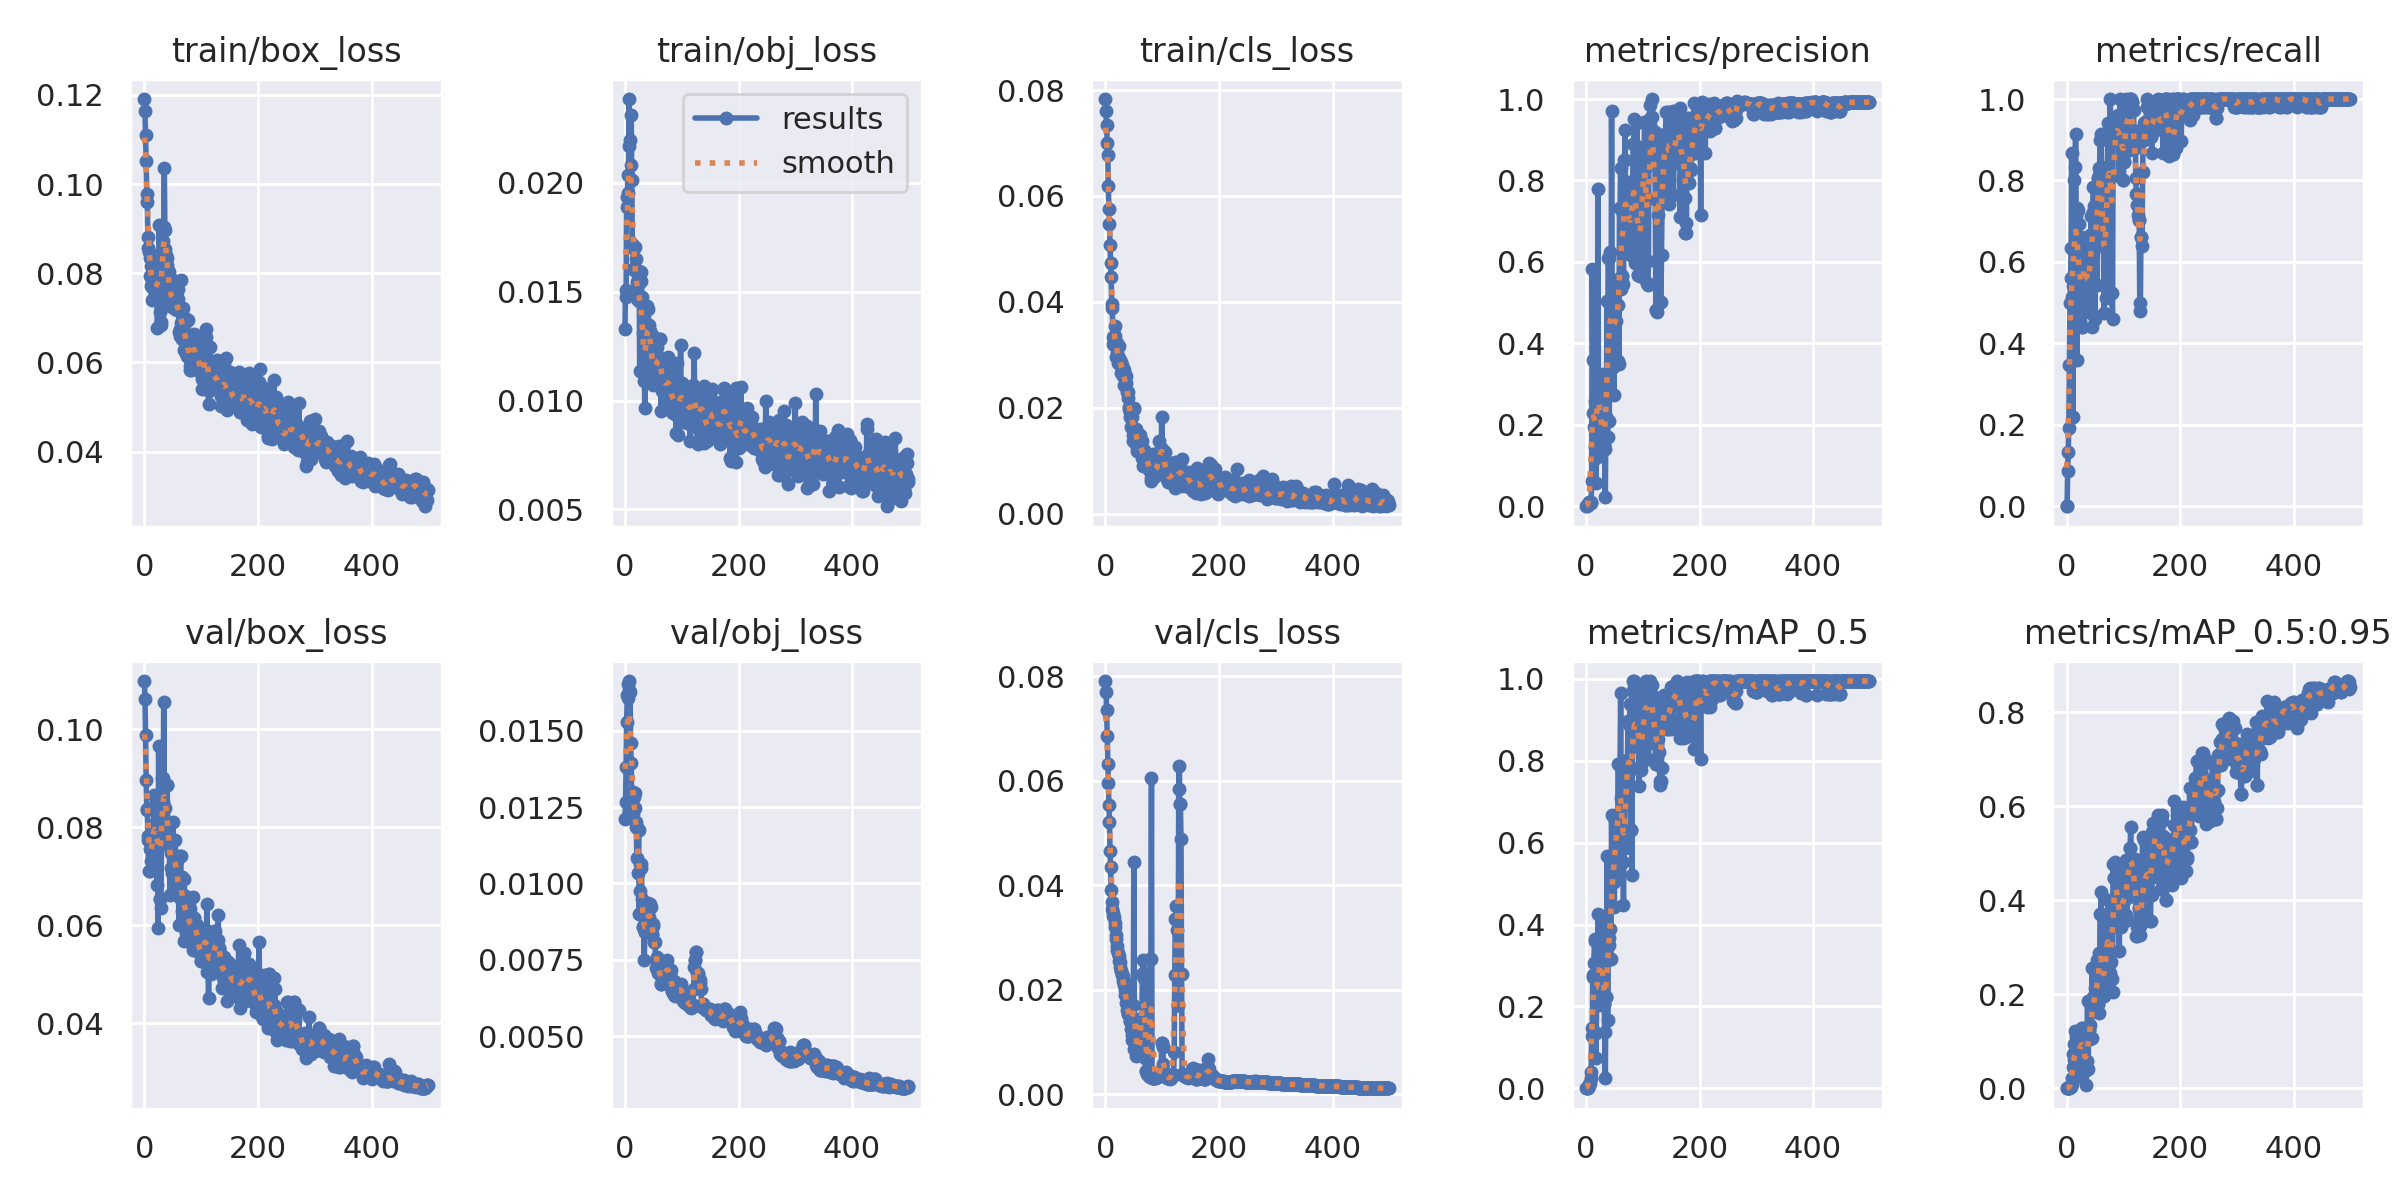

In [32]:
from IPython.display import Image, display

# The path to the graph img file
image_path = 'yolov5/runs/train/exp6/results.png'

# Display the image
display(Image(filename=image_path))

# Load Custom Model

"""
<br>
<b>Command:</b>
<br>
<i>torch.hub.load</i>&emsp; - &emsp;Load an ultralytics model from Torch Hub, more info: https://pytorch.org/hub/ultralytics_yolov5/
<br>
<br>
<b>Params:</b>
<br>
<i>'ultralytics/yolov5'</i>&emsp; - &emsp;Package that we need
<br>
<i>'custom'</i>&emsp; - &emsp; - &emsp; - &emsp; - &emsp;Model Version
<br>
<i>path</i>&emsp; - &emsp; - &emsp; - &emsp; - &emsp; - &emsp;Location of the data that the model generated.
<br>
<i>force_reload</i>&emsp; - &emsp; - &emsp; - &emsp;Can be used and without this, in my case, I had an error with loading, and needed to force it a bit :)
<br>
"""

In [33]:
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/codewizard/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-25 Python-3.11.5 torch-2.1.2+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Testing

In [34]:
test_img = os.path.join('yolov5/data', 'images', 'drowsy.8fc5d456-a7c9-11ee-8d8f-0800274e8518.jpg')

In [35]:
results = custom_model(test_img)

In [36]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 3.9ms pre-process, 96.7ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


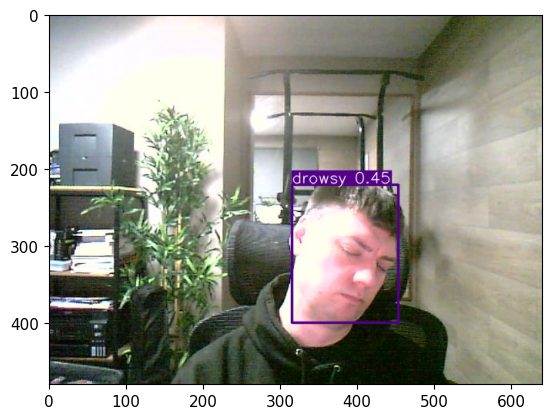

In [37]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [38]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /home/codewizard/Documents/PyTorch


In [39]:
image_path = '~/Documents/PyTorch/data/images/drowsy.8fc5d456-a7c9-11ee-8d8f-0800274e8518.jpg'
expanded_path = os.path.expanduser(image_path)

# Now `expanded_path` should contain the absolute path
print(expanded_path)

/home/codewizard/Documents/PyTorch/data/images/drowsy.8fc5d456-a7c9-11ee-8d8f-0800274e8518.jpg


In [45]:
# Path where Yolov5 saved a file with results
file_path = os.path.join('yolov5/runs/', 'train/exp8/', 'results.csv')

# Number of lines we need to read
num_lines = 5  

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# .sample - pick randomly rows from a data frame
random_lines = df.sample(n=num_lines)

# Display the randomly selected lines
random_lines


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
102,102,0.045538,0.010921,0.006675,0.81701,...,0.006418,0.003237,0.006667,0.006667,0.006667
95,95,0.051823,0.010480,0.008446,0.61020,...,0.006595,0.003257,0.006898,0.006898,0.006898
170,170,0.037324,0.009835,0.006392,0.99540,...,0.005768,0.002980,0.004423,0.004423,0.004423
14,14,0.075964,0.016964,0.031985,0.29153,...,0.012077,0.033661,0.060197,0.004197,0.004197
88,88,0.052241,0.010490,0.009589,0.94402,...,0.006664,0.003717,0.007129,0.007129,0.007129


In [49]:
def model_testing():

    # Create a VideoCapture object to capture video from the default camera (0)
    cap = cv2.VideoCapture(0)
    
    # Start an infinite loop to continuously capture frames from the camera
    while cap.isOpened():
        # Read a frame from the video capture
        ret, frame = cap.read()
    
        # Apply the YOLOv5 model to the captured frame
        results = custom_model(frame)
    
        # Display the processed frame with bounding boxes using OpenCV
        cv2.imshow('Trained Model', np.squeeze(results.render()))
    
        # Wait for a key press for 10 milliseconds and check if the key pressed is 'q' to exit the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    # Release the VideoCapture object to free up resources
    cap.release()
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()

# Test the Model in Real time

In [50]:
# model_testing()